# MLP 

Multilayer Perceptrons and Optimization

In [14]:
import torch
from torch import nn
from d2l import torch as d2l
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


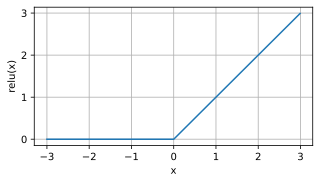

In [15]:
x = torch.arange(-3.0, 3.0, 0.01, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5)) # detaches autograd


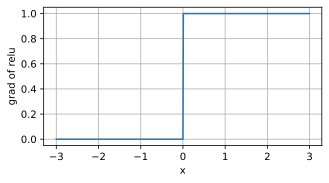

In [16]:
y.backward(torch.ones_like(x), retain_graph=True)

d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

In [17]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma) # track this by autograd instead of constructing the thing with torch.random() and the other stuff in the previous sections
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

def relu(x):
    a = torch.zeros_like(x)
    return torch.max(a,x)

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape(-1, self.W1.shape[0])
    return torch.matmul(relu(torch.matmul(X, self.W1) + self.b1), self.W2) + self.b2


KeyboardInterrupt: 

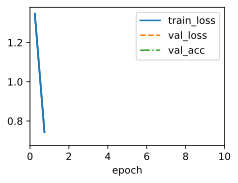

In [18]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [19]:
class MLPBetter(d2l.Classifier):
    def __init__(self, num_outputs, num_hidden, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hidden), nn.Sigmoid(), nn.LazyLinear(num_outputs))

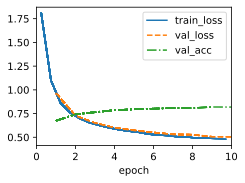

In [20]:
model = MLPBetter(num_outputs=10, num_hidden=256, lr=0.1)
trainer.fit(model, data)